In [1024]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv
/kaggle/input/new-york-city-airbnb-open-data/New_York_City_.png


In [1025]:
data_path = pd.read_csv('../input/new-york-city-airbnb-open-data/AB_NYC_2019.csv')

In [1026]:
data_path[['price']].head()

,price
0,149
1,225
2,150
3,89
4,80


**'Feature We Will Used'**
* 'latitude',
* 'longitude',
* 'price',
* 'minimum_nights',
* 'number_of_reviews',
* 'reviews_per_month',
* 'calculated_host_listings_count',
* 'availability_365'



In [1027]:
feature_data = data_path[['latitude',
'longitude',
'price',
'minimum_nights',
'number_of_reviews',
'reviews_per_month',
'calculated_host_listings_count',
'availability_365']]

noprice_feature = data_path[['latitude',
'longitude',
'minimum_nights',
'number_of_reviews',
'reviews_per_month',
'calculated_host_listings_count',
'availability_365']]

price_feature = data_path[['price']]

In [1028]:
feature_data.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,NaN,1,365
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0


# Question 1

In [1029]:
feature_data.isnull().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

# Question 2

In [1030]:
minimum_data = feature_data[['minimum_nights']]
minimum_data.median()

minimum_nights    3.0
dtype: float64

# Question 3

In [1031]:
total_data = len(feature_data)
print(total_data) #find how many data inside 

48895


In [1032]:
n_val = int(total_data * 0.2)
n_test = int(total_data * 0.2)
n_train = total_data - n_val - n_test
print("Validation: ",n_val,"Test: ", n_test,"Train: ", n_train)

Validation:  9779 Test:  9779 Train:  29337


In [1033]:
df_train = feature_data.iloc[:n_train]
df_val = feature_data.iloc[n_train:n_train+n_val]
df_test = feature_data.iloc[n_train+n_val:]

In [1034]:
idx = np.arange(total_data) #arrange the number in sequence (0 - total frequency of dataset)

np.random.seed(42)
np.random.shuffle(idx)

df_train = feature_data.iloc[idx[:n_train]]
df_val = feature_data.iloc[idx[n_train:n_train+n_val]]
df_test = feature_data.iloc[idx[n_train+n_val:]]

In [1035]:
df_train.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
879,40.64354,-73.97777,89,3,62,0.71,1,189
44383,40.70666,-73.90779,30,21,0,NaN,1,73
15394,40.76116,-73.99016,120,2,17,0.43,1,0
43230,40.70763,-74.01050,470,2,5,1.88,327,272
16332,40.79658,-73.93287,199,2,30,0.80,1,30


In [1036]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True) #drop, to start from index 1

In [1037]:
df_train.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64354,-73.97777,89,3,62,0.71,1,189
1,40.70666,-73.90779,30,21,0,NaN,1,73
2,40.76116,-73.99016,120,2,17,0.43,1,0
3,40.70763,-74.01050,470,2,5,1.88,327,272
4,40.79658,-73.93287,199,2,30,0.80,1,30


In [1038]:
len(df_train), len(df_val), len(df_test)

(29337, 9779, 9779)

In [1039]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [1040]:

y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

In [1041]:

del df_train['price']
del df_val['price']
del df_test['price']

# Question 3 (Not Validate)

In [1042]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [1043]:

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [1044]:
df_train.columns

Index(['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

# fill with 0

In [1045]:

X_train = df_train.fillna(0).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

In [1046]:
w0

-419.9126587294167

In [1047]:
w

array([ 1.30676225e+00, -5.02167855e+00, -5.59803110e-04, -4.07634896e-04,
       -8.25470065e-03,  1.33371320e-03,  6.50203890e-04])

<AxesSubplot:ylabel='Count'>

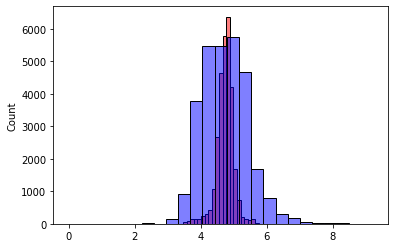

In [1048]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=25)
sns.histplot(y_train, color='blue', alpha=0.5, bins=25)

In [1049]:
rmse(y_train, y_pred)

0.6428860484860429

# mean of the variable

In [1050]:
X_train = df_train.fillna(3).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

In [1051]:
w0

-425.758901106804

In [1052]:
w

array([ 1.31064245e+00, -5.09826831e+00, -4.85629347e-04, -7.73580794e-04,
        1.50742263e-02,  1.28661409e-03,  6.32073810e-04])

<AxesSubplot:ylabel='Count'>

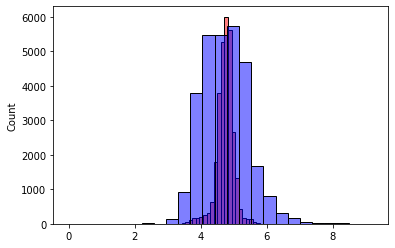

In [1053]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=25)
sns.histplot(y_train, color='blue', alpha=0.5, bins=25)

In [1054]:
rmse(y_train, y_pred)

0.642581776108164

# Question 3 (Validate)

In [1055]:
df_train.minimum_nights.max()

1000

# Fill with 0

In [1056]:
def prepare_X(df):
    df = df.copy()
    
    df['nights'] = 1000 - df['minimum_nights']
    features = base + ['nights']
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [1057]:

X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.6934341451716302

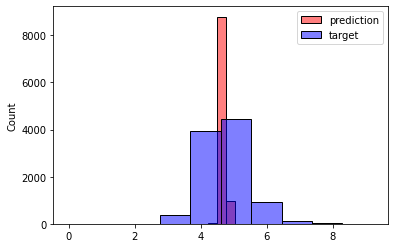

In [1058]:
sns.histplot(y_pred, label='prediction', color='red', alpha=0.5, bins=10)
sns.histplot(y_val, label='target', color='blue',  alpha=0.5, bins=10)
plt.legend()

# Question 4

In [1059]:

def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [1060]:

X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.6934334799349426

In [1061]:

for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, round(score,2))

0.0 5.639493108045346 0.69
1e-05 5.639488764671668 0.69
0.0001 5.639449674673442 0.69
0.001 5.639058804441484 0.69
0.1 5.596391363286801 0.69
1 5.236215605529924 0.69
10 3.1858582443613703 0.7


# Question 5